In [14]:
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
from scipy.stats import chisquare
import statsmodels.api as sm

In [40]:
def linear_test(x, y):
    """
    Fit a linear regression model of the target (census) cell values against the synthetic ones 
    """
    model = sm.OLS(endog=y, 
               exog=sm.add_constant(x))
    
    results = model.fit()
    
    return results

def get_linear_params(results):
    intercept, slope = results.params
    rsquared = results.rsquared
    return intercept, slope, rsquared

def print_linear_test(results):    
    print('Intercept: {:,.2f}'.format(results.params[0]))
    print('Slope: {:,.2f}'.format(results.params[1]))
    print('R2: {:,.2f}'.format(results.rsquared))
    
    
def plot_fit(x, y, xlabel='census', ylabel='synthetic', alpha = 0.3,
            export_path = None, title = None):
    
    plt.figure(figsize=(10,10))
    intercept, slope, rsquared = get_linear_params(linear_test(x, y))
    x_min = min(x.min(), y.min())
    x_max = max(x.max(), y.max())
    plt.scatter(x, y, alpha=alpha)

    plt.plot((x_min,x_max),(x_min,x_max), label = 'y = x')
    plt.plot((x_min,x_max),(intercept+x_min*slope, intercept+x_max*slope), 
             label = 'y= {:,.3f} + {:,.3f}x \n(R2={:,.3f})'.format(
                intercept, slope, rsquared))
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xlim(0,x_max*1.1)
    plt.grid()
    plt.legend()
    if title is not None:
        plt.title(title)
        
#     if export_path is not None:
#         write_plt(plt, export_path)

In [46]:
synthetic_persons = pd.read_csv('output/synthetic_persons.csv')
synthetic_households = pd.read_csv('output/synthetic_households.csv')
difference_sa2 = pd.read_csv('output/final_summary_SA2.csv')

control_total_sa4 = pd.read_csv('data/controls_total_SA4.csv')

In [47]:
print(f"Total persons: {sum(control_total_sa4.Tot_P_P)}")
print(f"Total households: {sum(control_total_sa4.Total_dwelings)}")

print(f"Total synthetic persons: {len(synthetic_persons)}")
print(f"Total synthetic households: {len(synthetic_households)}")

Total persons: 5926629
Total households: 2112715
Total synthetic persons: 5918713
Total synthetic households: 2112751


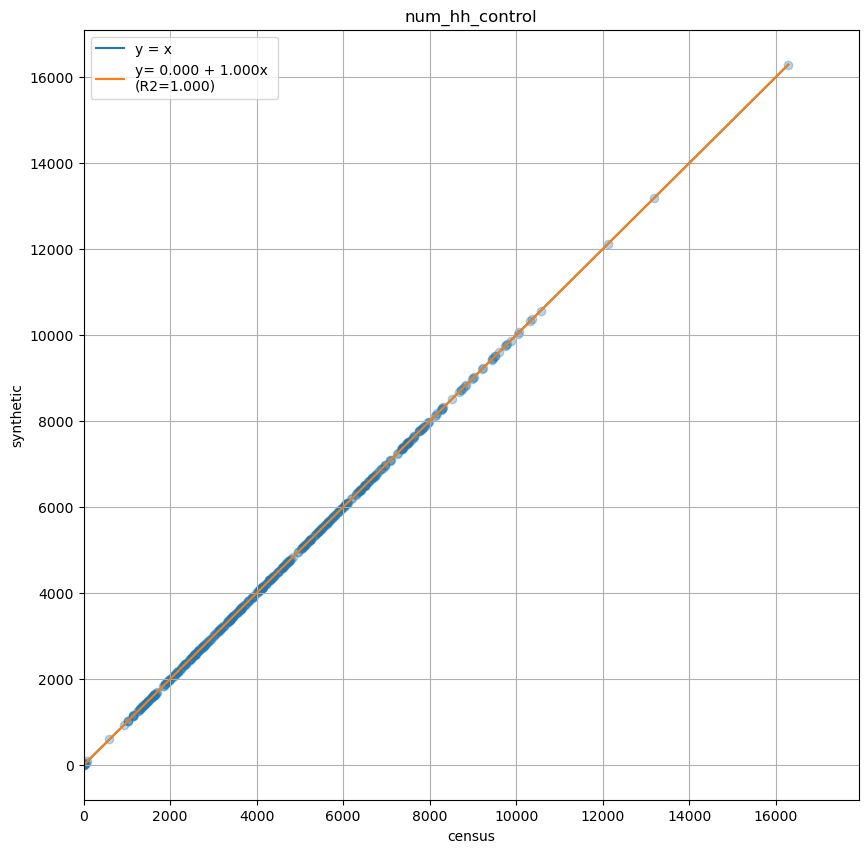

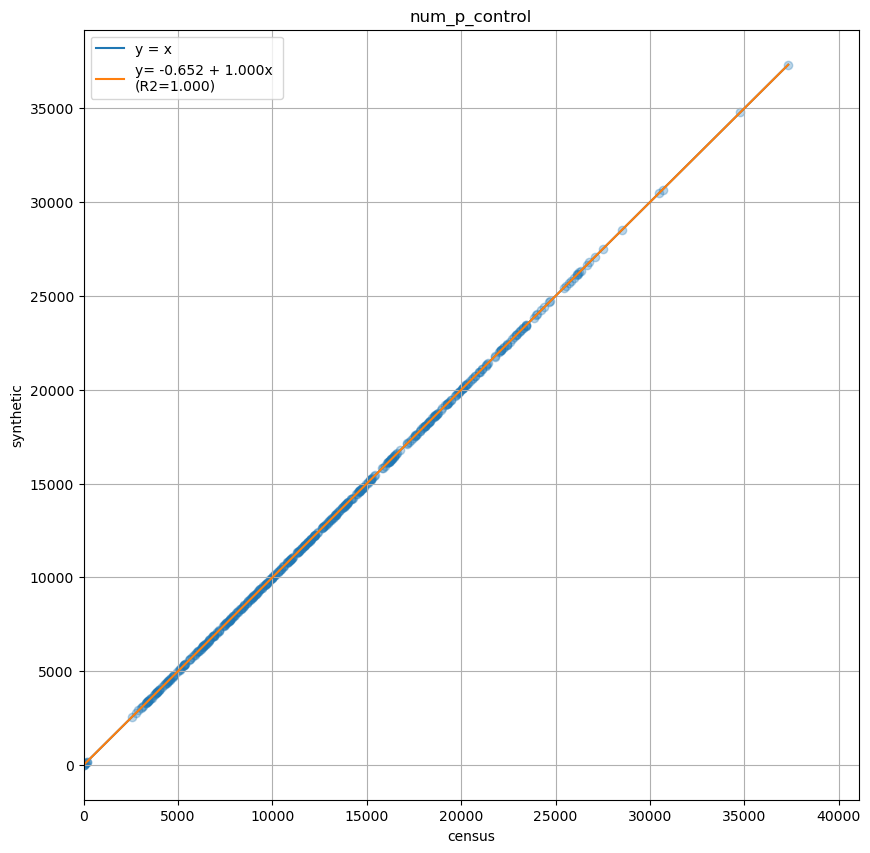

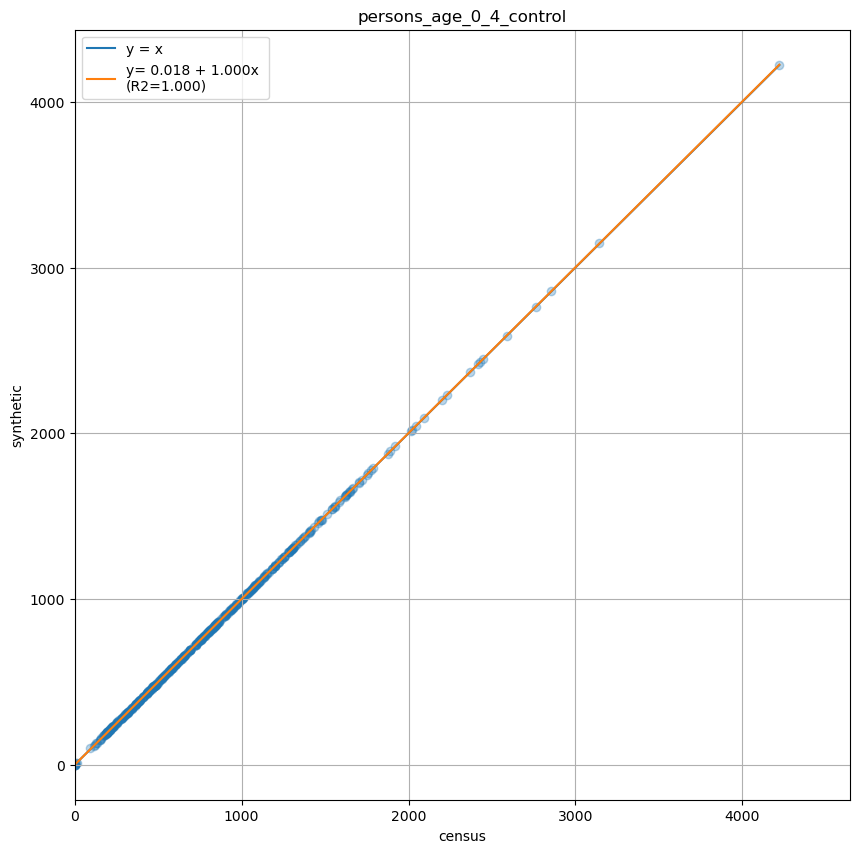

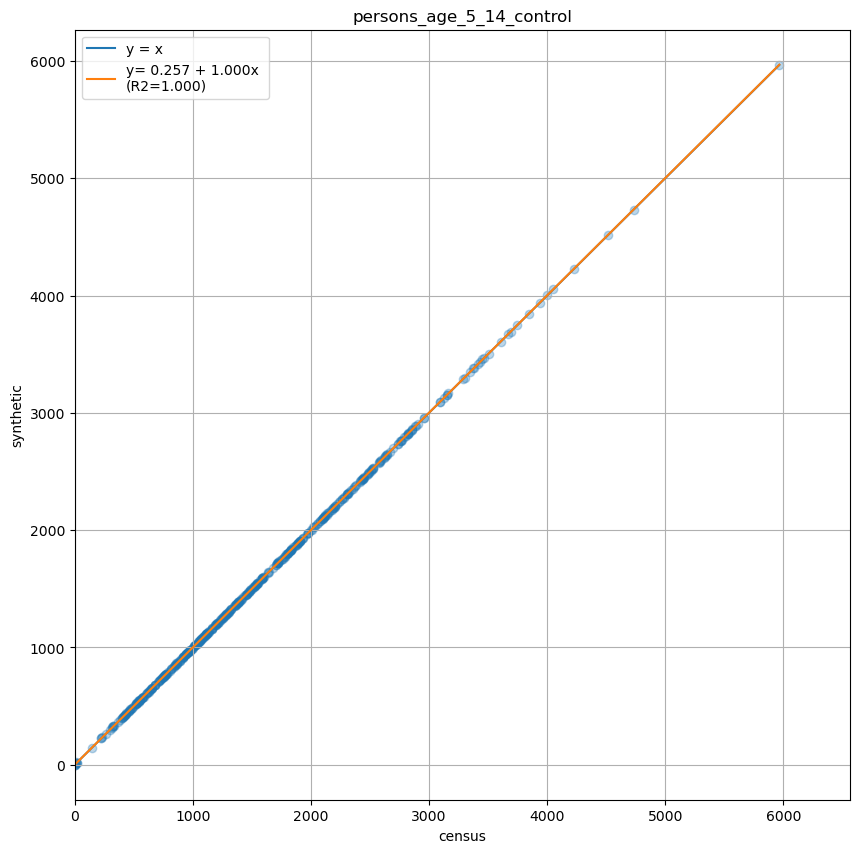

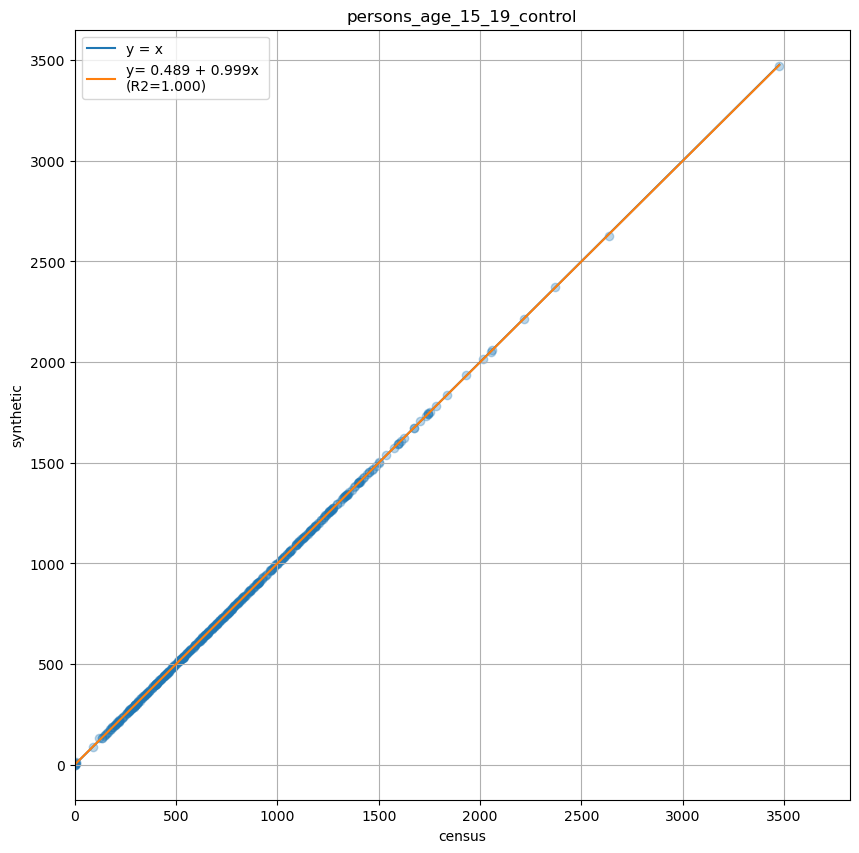

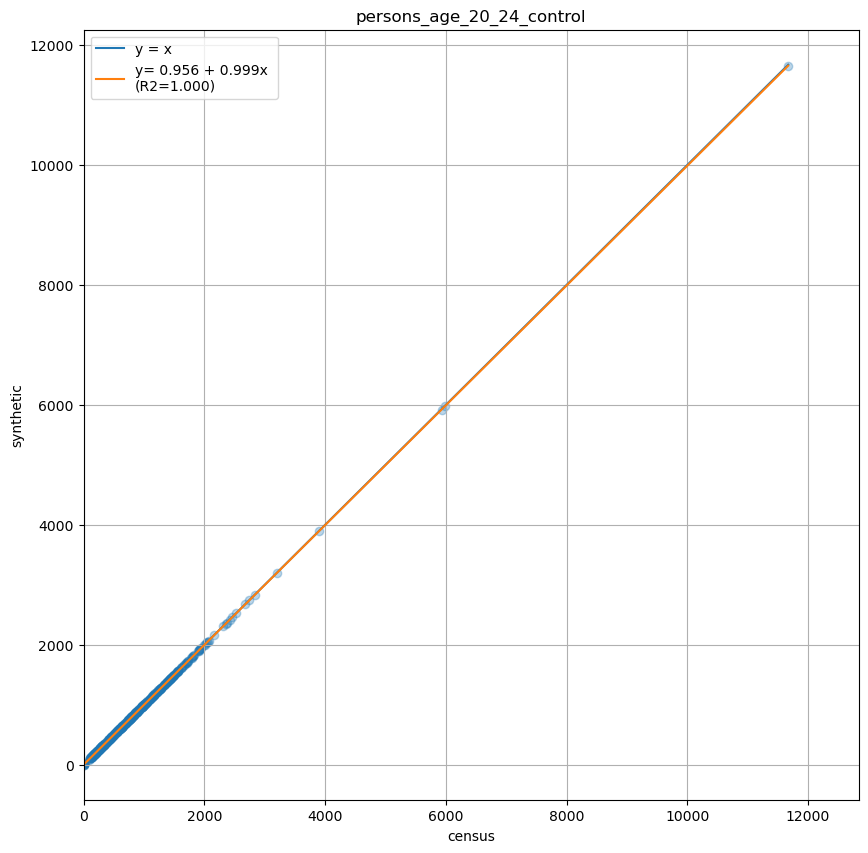

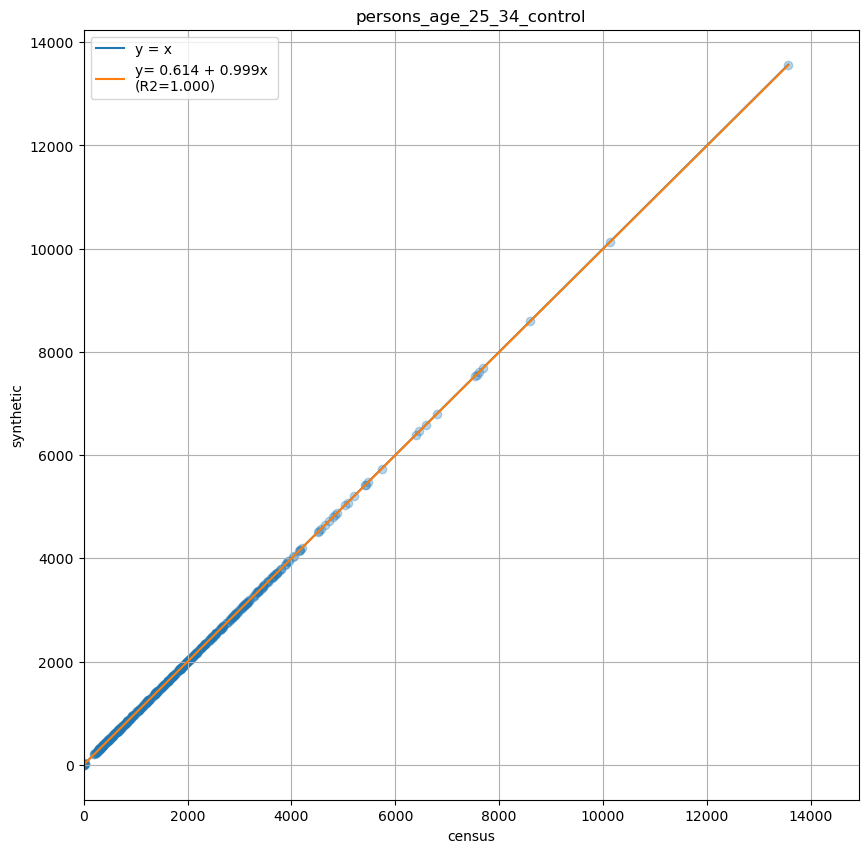

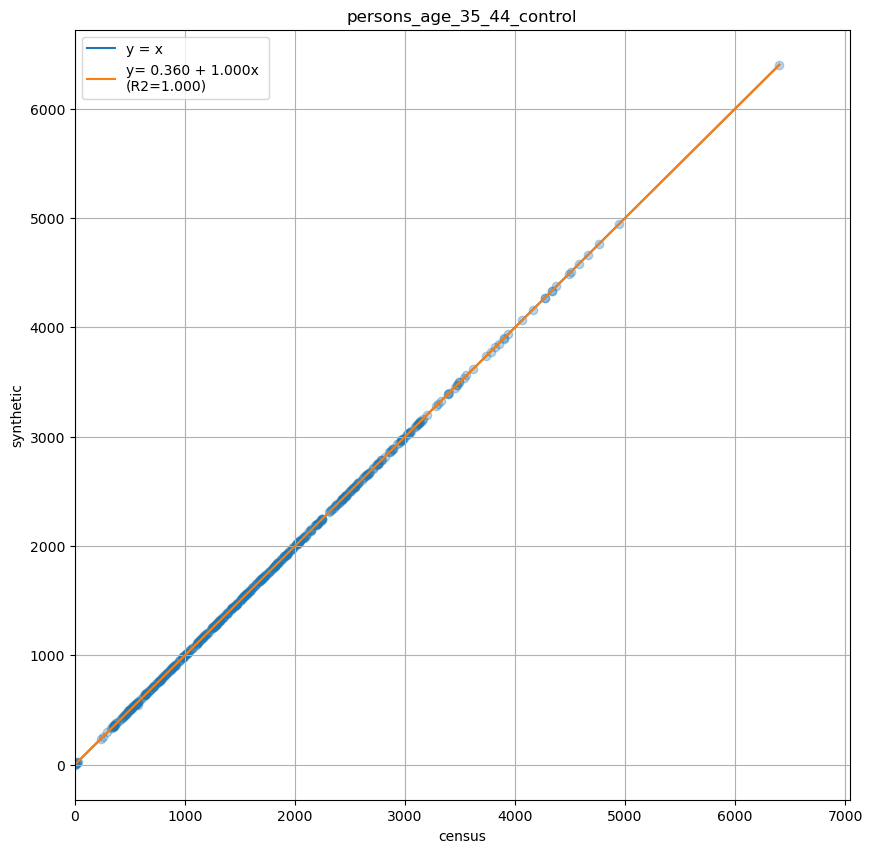

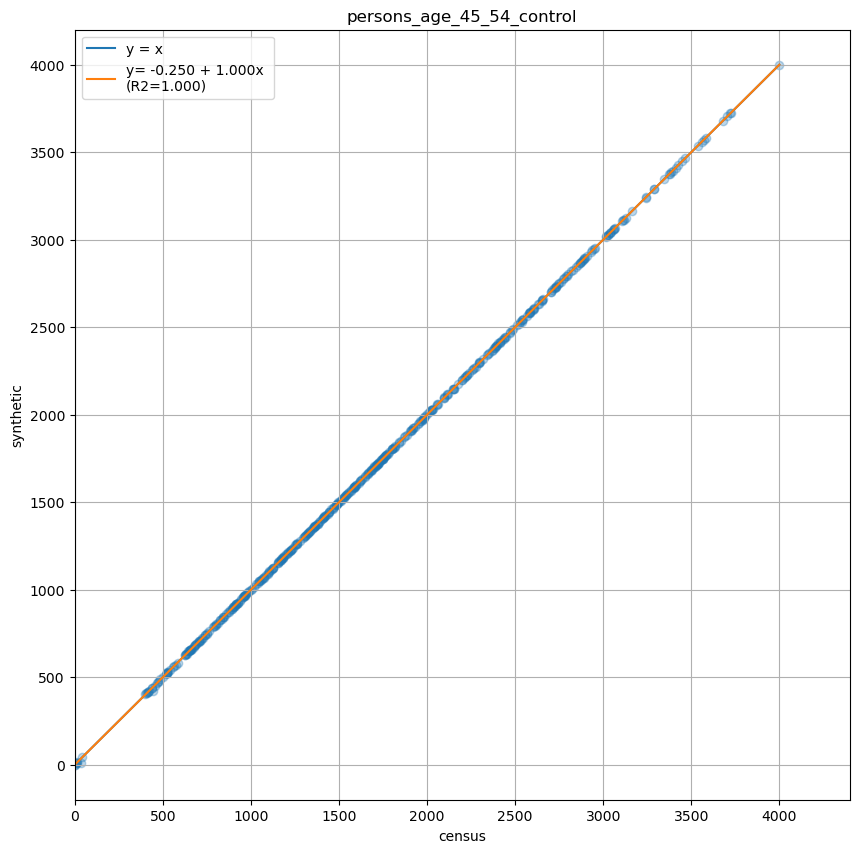

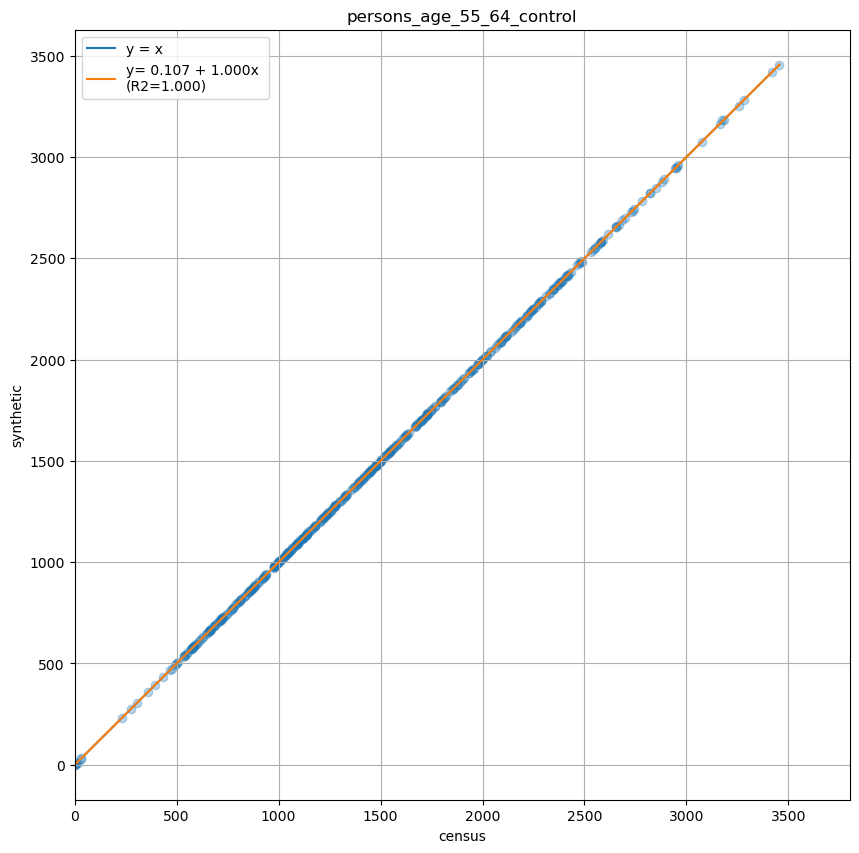

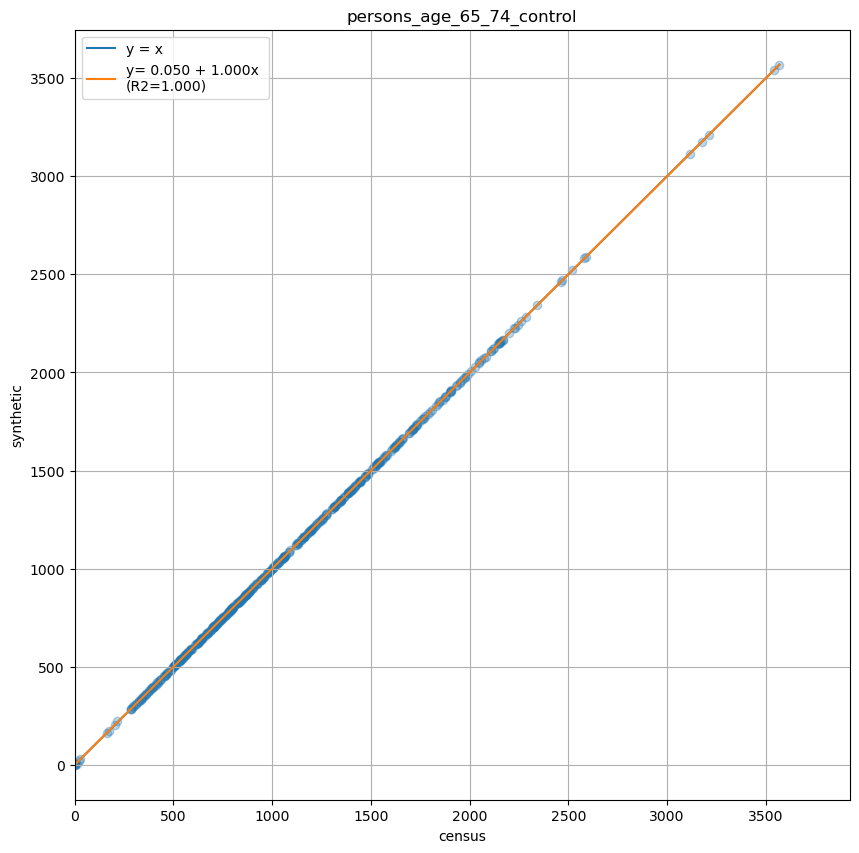

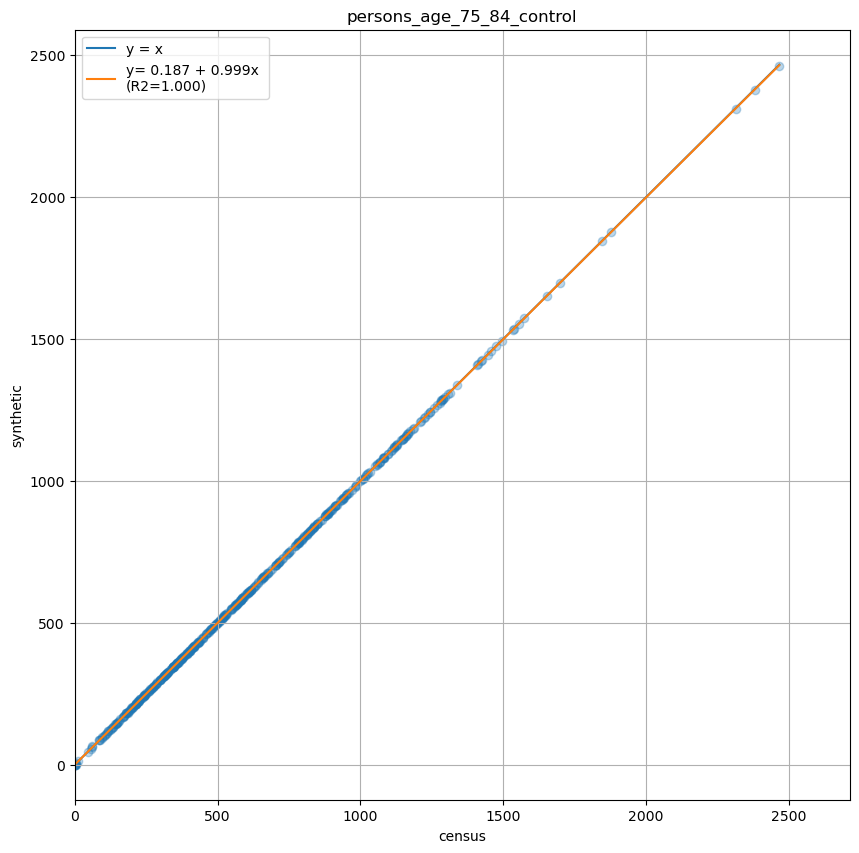

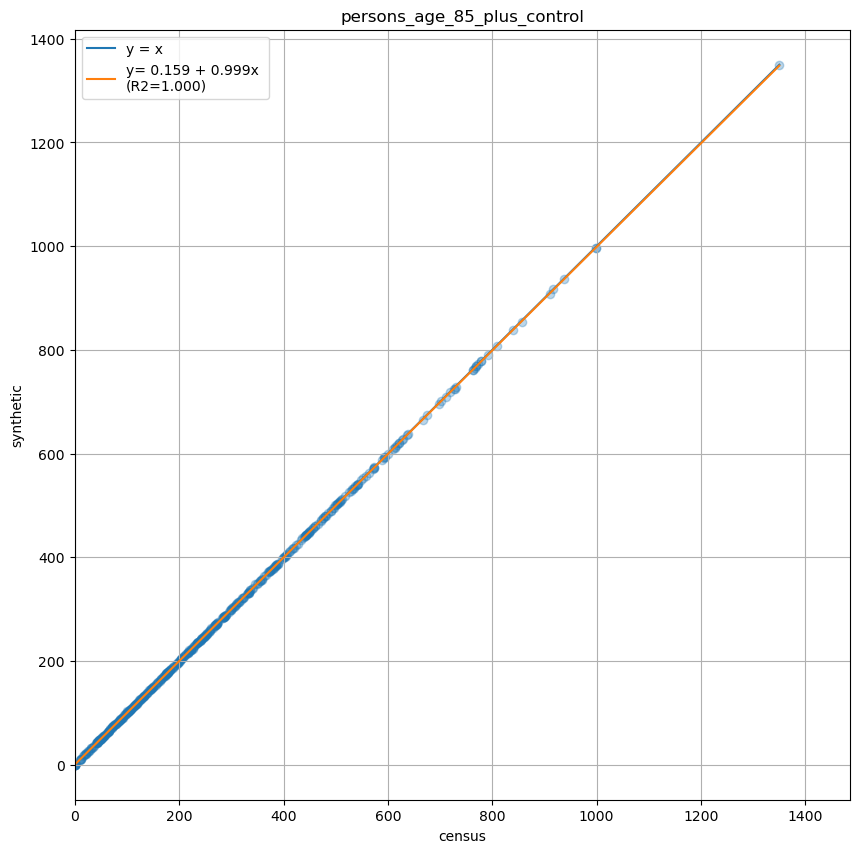

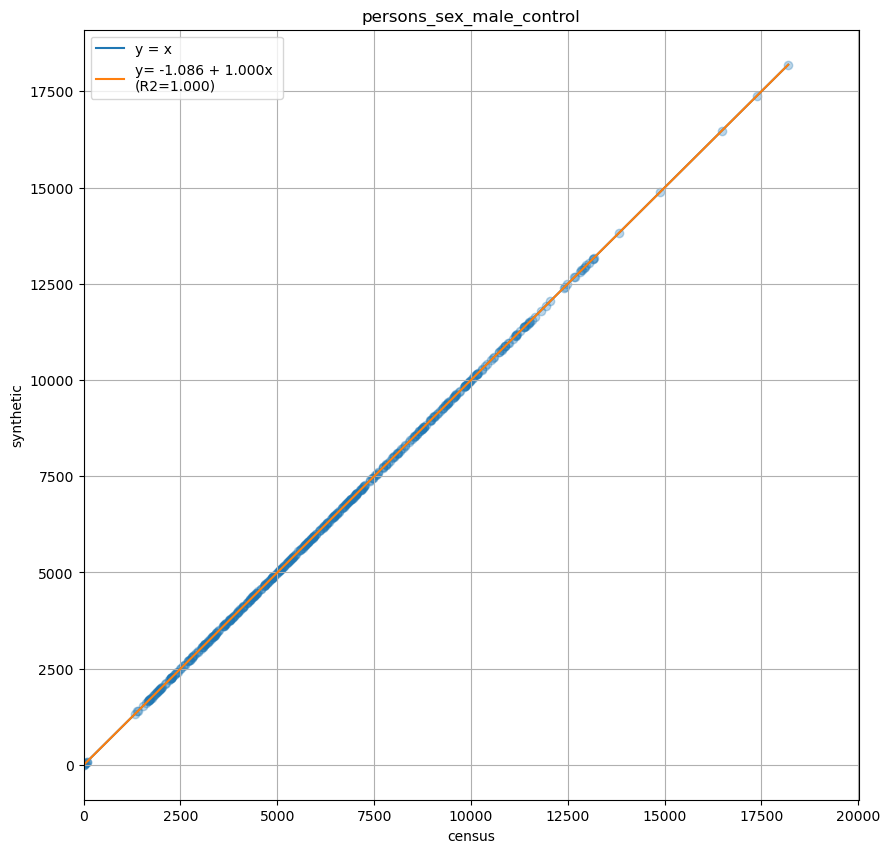

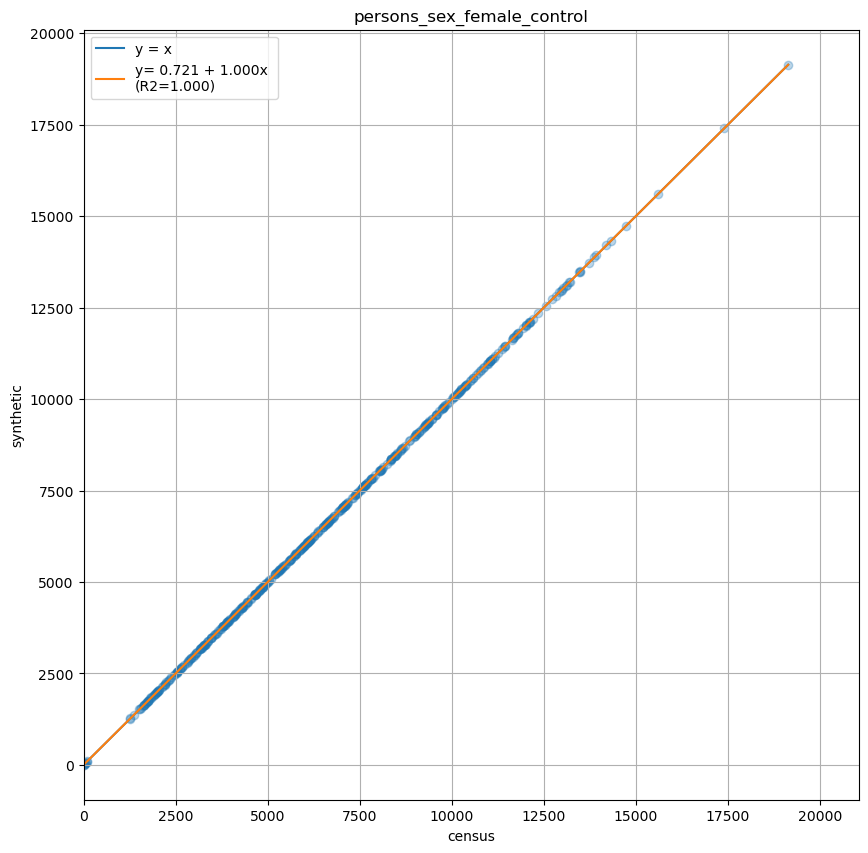

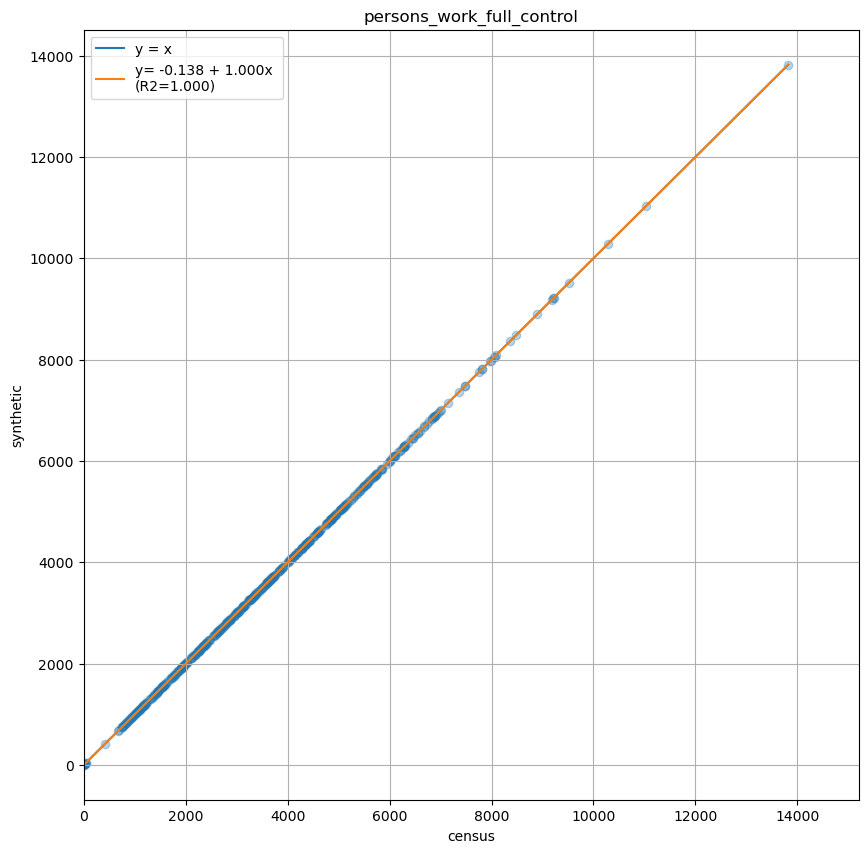

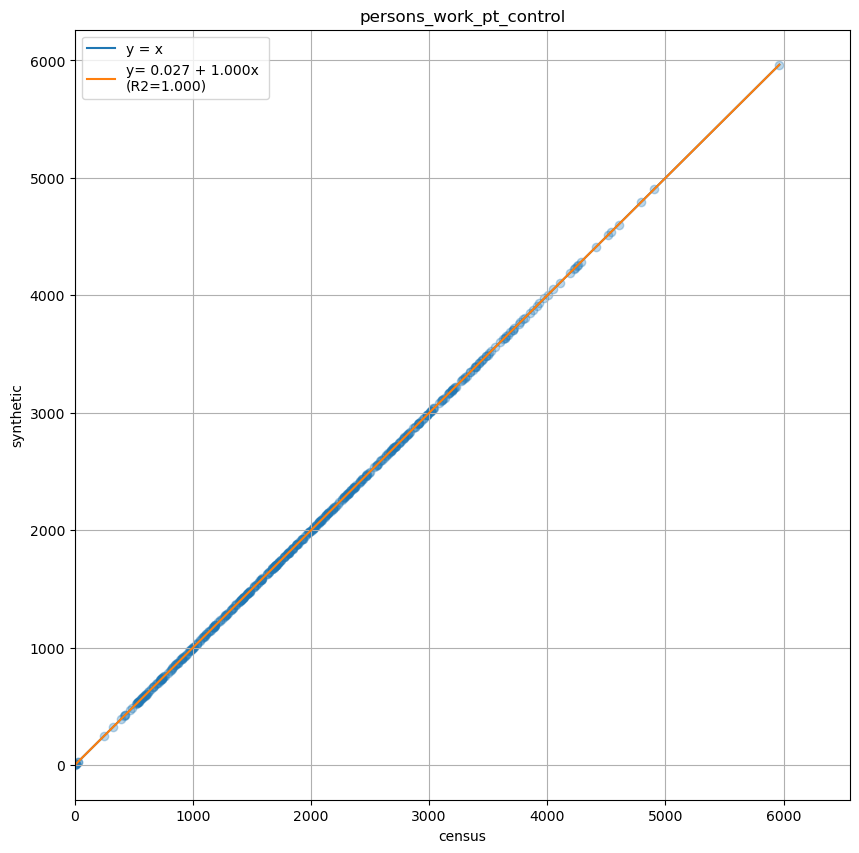

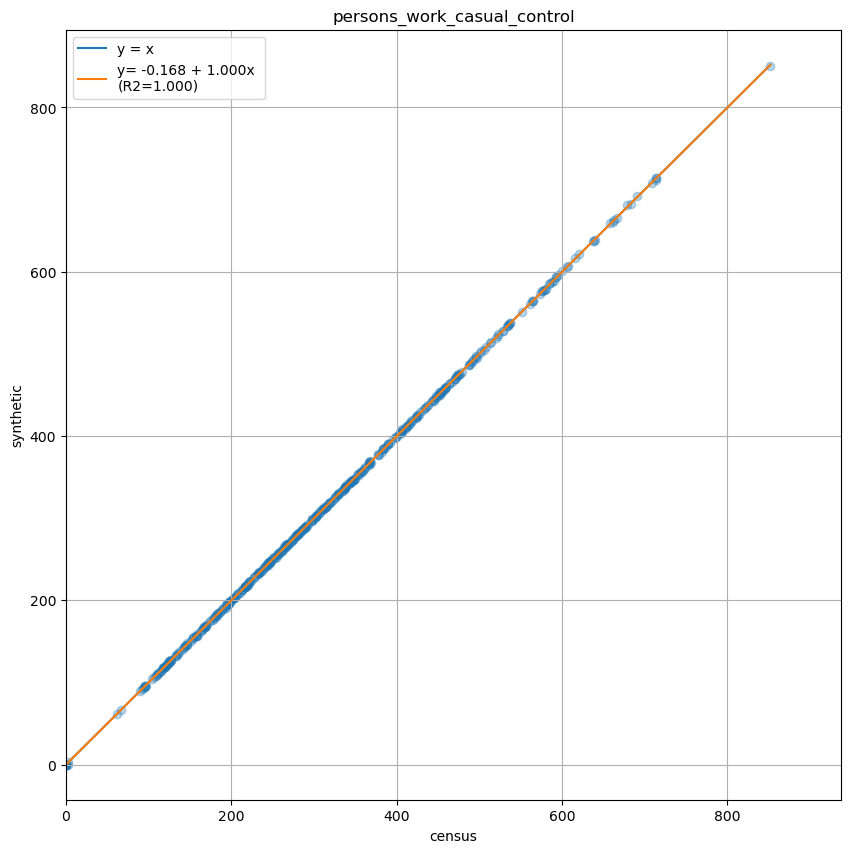

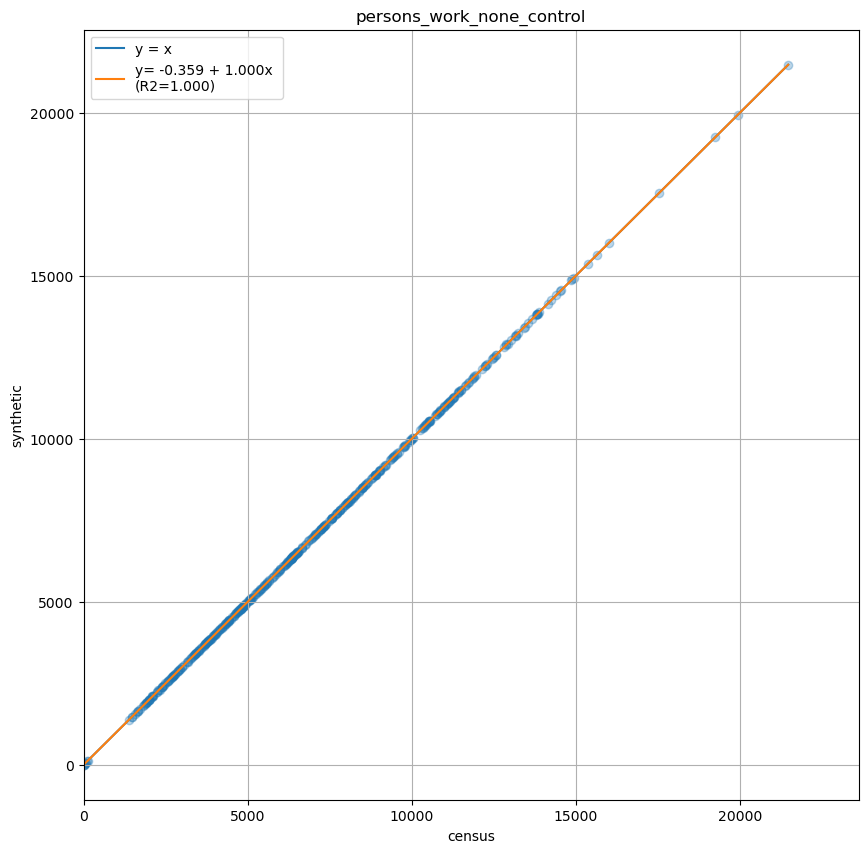

In [48]:
compare_columns = difference_sa2.columns[2:40]
for i in range(19):
    plot_fit(difference_sa2[compare_columns[i]],difference_sa2[compare_columns[i+19]],title=compare_columns[i])